In [26]:
library(base64)

# Load Dataset

In [2]:
cc = read.csv('cerv_cancer.csv', header = T, stringsAsFactors = FALSE)



As we are only using Biopsy as a response, we will remove Hinselmann, Schiller, and Citology which are also all tests for cervical cancer.

In [3]:
cc <- subset(cc, select =-c(Hinselmann, Schiller, Citology))

In [4]:
head(cc,5)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Smokes..packs.year.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,...,STDs.Hepatitis.B,STDs.HPV,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Dx.Cancer,Dx.CIN,Dx.HPV,Dx,Biopsy
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,?,?,1,0,1,0,0
46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0


In [5]:
dim(cc)

[1] 858  33

In [6]:
cc[1:3,1:8]

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Smokes..packs.year.,Hormonal.Contraceptives
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0
34,1.0,?,1.0,0.0,0.0,0.0,0.0


In [7]:
cc[1:3,9:16]

Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs.condylomatosis,STDs.cervical.condylomatosis,STDs.vaginal.condylomatosis
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
cc[1:3,17:25]

STDs.vulvo.perineal.condylomatosis,STDs.syphilis,STDs.pelvic.inflammatory.disease,STDs.genital.herpes,STDs.molluscum.contagiosum,STDs.AIDS,STDs.HIV,STDs.Hepatitis.B,STDs.HPV
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
cc[1:3,26:33]

STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Dx.Cancer,Dx.CIN,Dx.HPV,Dx,Biopsy
0,?,?,0,0,0,0,0
0,?,?,0,0,0,0,0
0,?,?,0,0,0,0,0


We will replace the question marks in the datset with NULL (NA)

In [10]:
cc[cc == "?"] <- NA

33 of the attributes have NA's and 2 predictors (Time since first/last diagnosis are almost entirely composed of NA values). Because of this, we will remove those variables.

In [11]:
na_count <- sapply(cc, function(y) sum(length(which(is.na(y)))))
print(length(na_count))
data.frame(na_count[na_count > 0])

[1] 33


,na_count.na_count...0.
Number.of.sexual.partners,26
First.sexual.intercourse,7
Num.of.pregnancies,56
Smokes,13
Smokes..years.,13
Smokes..packs.year.,13
Hormonal.Contraceptives,108
Hormonal.Contraceptives..years.,108
IUD,117
IUD..years.,117


In [12]:
cc <- subset(cc, select =-c(STDs..Time.since.last.diagnosis,STDs..Time.since.first.diagnosis))

We will replace all the NA's with 0 to keep the data consistent

In [13]:
cc[is.na(cc)] <- 0

Convert all values in our dataset into numeric ones

In [14]:
cc = sapply(cc, as.numeric)

Remove columns which are entirely composed of 0

In [15]:
zeroes = data.frame(colSums(cc != 0)[colSums(cc != 0) < 10])
zeroes$names <- rownames(zeroes)
as.vector(unlist(zeroes["names"]))

[1] "STDs.cervical.condylomatosis"     "STDs.vaginal.condylomatosis"     
[3] "STDs.pelvic.inflammatory.disease" "STDs.genital.herpes"             
[5] "STDs.molluscum.contagiosum"       "STDs.AIDS"                       
[7] "STDs.Hepatitis.B"                 "STDs.HPV"                        
[9] "Dx.CIN"

In [16]:
cc <- subset(cc, select =-c(STDs.cervical.condylomatosis, STDs.vaginal.condylomatosis))
cc <- subset(cc, select =-c(STDs.pelvic.inflammatory.disease, STDs.genital.herpes))
cc <- subset(cc, select =-c(STDs.molluscum.contagiosum, STDs.AIDS, STDs.Hepatitis.B, STDs.HPV, Dx.CIN))

In [17]:
cc <- data.frame(cc)

# Exploratory Data Analysis

In [18]:
summary(cc)

      Age        Number.of.sexual.partners First.sexual.intercourse
 Min.   :13.00   Min.   : 0.000            Min.   : 0.00           
 1st Qu.:20.00   1st Qu.: 1.000            1st Qu.:15.00           
 Median :25.00   Median : 2.000            Median :17.00           
 Mean   :26.82   Mean   : 2.451            Mean   :16.86           
 3rd Qu.:32.00   3rd Qu.: 3.000            3rd Qu.:18.00           
 Max.   :84.00   Max.   :28.000            Max.   :32.00           
 Num.of.pregnancies     Smokes       Smokes..years.   Smokes..packs.year.
 Min.   : 0.000     Min.   :0.0000   Min.   : 0.000   Min.   : 0.0000    
 1st Qu.: 1.000     1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.: 0.0000    
 Median : 2.000     Median :0.0000   Median : 0.000   Median : 0.0000    
 Mean   : 2.127     Mean   :0.1434   Mean   : 1.201   Mean   : 0.4463    
 3rd Qu.: 3.000     3rd Qu.:0.0000   3rd Qu.: 0.000   3rd Qu.: 0.0000    
 Max.   :11.000     Max.   :1.0000   Max.   :37.000   Max.   :37.0000    
 Hormo

In [19]:
num_vars <- c("Age","Smokes..years.", 'Smokes..packs.year.', 
              "Number.of.sexual.partners", "First.sexual.intercourse", 
     "Num.of.pregnancies","STDs..number.", "Hormonal.Contraceptives..years.", 'STDs..Number.of.diagnosis',
             'IUD..years.')

numeric_data <- cc[num_vars]
categorical_data = cc[,!(names(cc) %in% num_vars)]

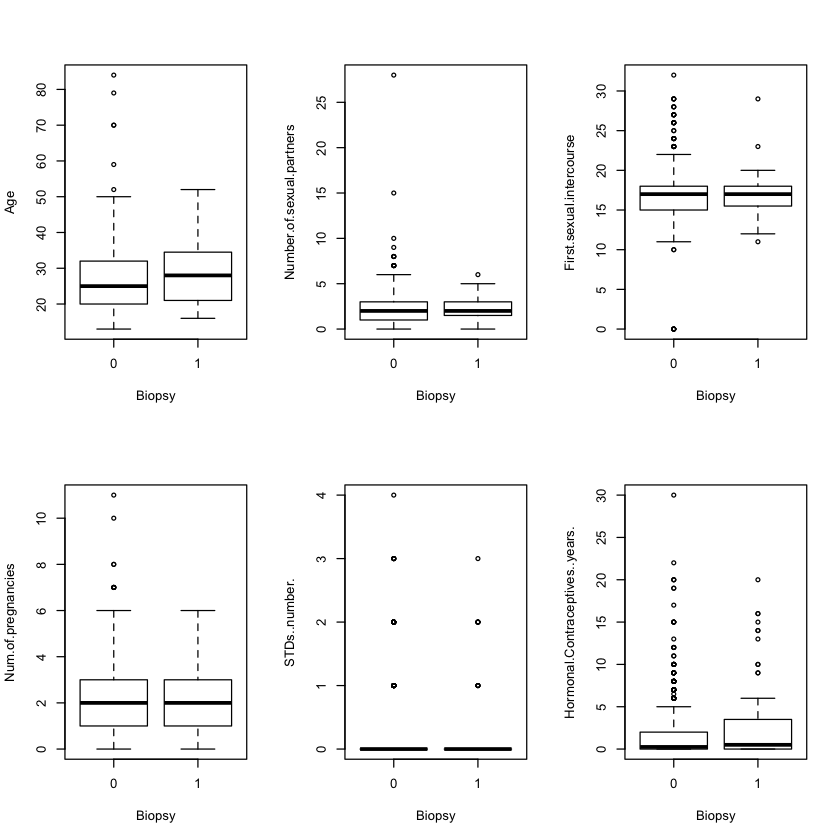

In [20]:
attach(cc)
par(mfrow = c(2,3))
boxplot(Age ~ Biopsy)
boxplot(Number.of.sexual.partners ~ Biopsy)
boxplot(First.sexual.intercourse ~ Biopsy)
boxplot(Num.of.pregnancies ~ Biopsy)
boxplot(STDs..number. ~ Biopsy)
boxplot(Hormonal.Contraceptives..years. ~ Biopsy)


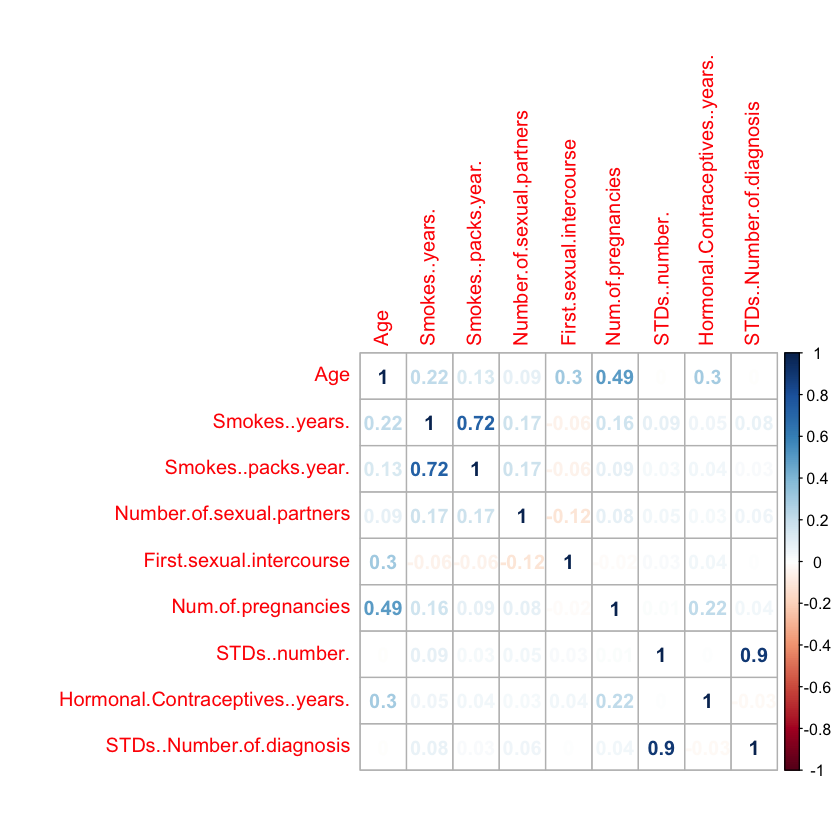

In [34]:
library(corrplot)
corrplot(cor(numeric_data), method="number")

In [30]:
colnames(categorical_data)

[1] "Smokes"                             "Hormonal.Contraceptives"           
 [3] "IUD"                                "IUD..years."                       
 [5] "STDs"                               "STDs.condylomatosis"               
 [7] "STDs.vulvo.perineal.condylomatosis" "STDs.syphilis"                     
 [9] "STDs.HIV"                           "Dx.Cancer"                         
[11] "Dx.HPV"                             "Dx"                                
[13] "Biopsy"

The following objects are masked from cc (pos = 3):

    Age, Biopsy, Dx, Dx.Cancer, Dx.HPV, First.sexual.intercourse,
    Hormonal.Contraceptives, Hormonal.Contraceptives..years., IUD,
    IUD..years., Num.of.pregnancies, Number.of.sexual.partners, STDs,
    STDs..Number.of.diagnosis, STDs..number., STDs.HIV,
    STDs.condylomatosis, STDs.syphilis,
    STDs.vulvo.perineal.condylomatosis, Smokes, Smokes..packs.year.,
    Smokes..years.

The following objects are masked from cc (pos = 4):

    Age, Biopsy, Dx, Dx.Cancer, Dx.HPV, First.sexual.intercourse,
    Hormonal.Contraceptives, Hormonal.Contraceptives..years., IUD,
    IUD..years., Num.of.pregnancies, Number.of.sexual.partners, STDs,
    STDs..Number.of.diagnosis, STDs..number., STDs.HIV,
    STDs.condylomatosis, STDs.syphilis,
    STDs.vulvo.perineal.condylomatosis, Smokes, Smokes..packs.year.,
    Smokes..years.

The following objects are masked from cc (pos = 5):

    Age, Biopsy, Dx, Dx.Cancer, Dx.HPV, First.sexual.intercourse,

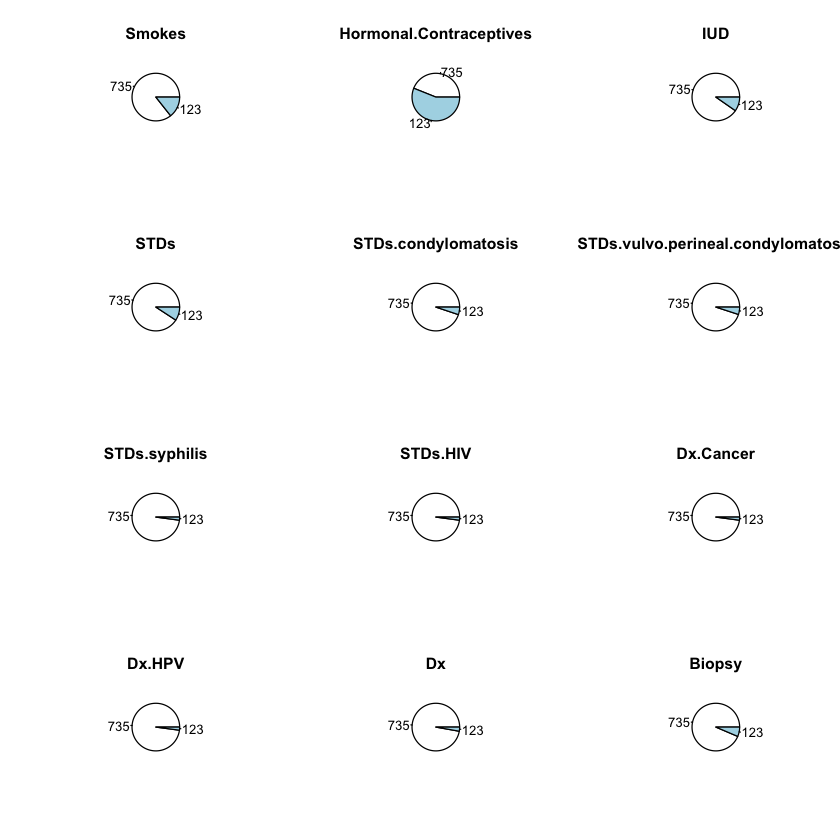

In [28]:
attach(cc)
par(mfrow = c(4,3))
pie(table(Smokes), labels = table(Smokes), main = 'Smokes')
pie(table(Hormonal.Contraceptives), labels = table(Smokes), main = 'Hormonal.Contraceptives')
pie(table(IUD), labels = table(Smokes), main = 'IUD')
pie(table(STDs), labels = table(Smokes), main = 'STDs')
pie(table(STDs.condylomatosis), labels = table(Smokes), main = 'STDs.condylomatosis')
pie(table(STDs.vulvo.perineal.condylomatosis), labels = table(Smokes), main = 'STDs.vulvo.perineal.condylomatosis')
pie(table(STDs.syphilis), labels = table(Smokes), main = 'STDs.syphilis')
pie(table(STDs.HIV), labels = table(Smokes), main = 'STDs.HIV')
pie(table(Dx.Cancer), labels = table(Smokes), main = 'Dx.Cancer')
pie(table(Dx.HPV), labels = table(Smokes), main = 'Dx.HPV')
pie(table(Dx), labels = table(Smokes), main = 'Dx')
pie(table(Biopsy), labels = table(Smokes), main = 'Biopsy')